In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_columns', 100)

from utils.utils import *
from utils.IBGETools import pop_ibge

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [2]:





# def pop_2010(force_download=False):
#     '''
#     I didn't find the 2010's data, had to make the dataset by myself.
#     '''
#     parent_path = 'ftp://ftp.ibge.gov.br/Censos/Censo_Demografico_2010/resultados/'
#     list_files = ["total_populacao_acre.zip","total_populacao_alagoas.zip","total_populacao_amapa.zip",
#                 "total_populacao_amazonas.zip", "total_populacao_bahia.zip", "total_populacao_ceara.zip", 
#                 "total_populacao_distrito_federal.zip", "total_populacao_espirito_santo.zip", 
#                 "total_populacao_goias.zip", "total_populacao_maranhao.zip","total_populacao_mato_grosso.zip",
#                 "total_populacao_mato_grosso_do_sul.zip","total_populacao_minas_gerais.zip",
#                 "total_populacao_para.zip",
#                 "total_populacao_paraiba.zip","total_populacao_parana.zip","total_populacao_pernambuco.zip",
#                 "total_populacao_piaui.zip","total_populacao_rio_de_janeiro.zip",
#                 "total_populacao_rio_grande_do_norte.zip",
#                 "total_populacao_rio_grande_do_sul.zip","total_populacao_rondonia.zip",
#                 "total_populacao_roraima.zip",
#                 "total_populacao_santa_catarina.zip","total_populacao_sao_paulo.zip",
#                 "total_populacao_sergipe.zip",
#                 "total_populacao_tocantins.zip"]
#     states = ['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT',
#               'MS', 'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO',
#               'RR', 'SC', 'SP', 'SE', 'TO']

#     filename_2010 = '2010_UF_Municipio.parquet'
#     local_file_2010 = os.path.join(PRODUCED_DATASETS, filename_2010)
    
#     if not os.path.exists(local_file_2010):
#         list_df = []
#         for file, uf in zip(list_files, states):
#             path = parent_path + file
#             local_path = download_zip(path, force_download=force_download)
#             with ZipFile(local_path) as zfile:
#                 file = zfile.namelist()[0]
#                 with zfile.open(file) as xls_file:
#                     temp_df = pd.read_excel(xls_file)
#                     temp_df = temp_df[['Nome do município', 'Total da população 2010']]
#                     temp_df.columns = ['nome', '2010']
#                     temp_df.nome = temp_df.nome + ' ({})'.format(uf)
#                     list_df.append(temp_df)
#         df = pd.concat(list_df, sort=False, ignore_index=True).dropna()
#         df.to_parquet(local_file_2010)
#     else:
#         df = pd.read_parquet(local_file_2010)
#     return df

In [3]:
import wget
import os
from utils import PRODUCED_DATASETS
from zipfile import ZipFile
import time


# # pop brasil IBGE por ano


# def download_pop_anual_IBGE(force_download=False):
#     '''
#     Download the PDF with the table each city's population from 2008 until 2018.
#     Returns
#     -------
#         pandas.DataFrame
#     '''
#     path_2012 = 'ftp://ftp.ibge.gov.br/Estimativas_de_Populacao/Estimativas_2012/\
#                     estimativa_2012_DOU_28_08_2012_xls.zip'
    
    
#     pop_list = []
# #     for year in range(2008, 2018):
#     for year in range(2012, 2013):
#         if year == 2010:
#             pop = pop_2010()
#             pop_list.append(pop)           
            
#         elif year == 2012:
#             path = 'ftp://ftp.ibge.gov.br/Estimativas_de_Populacao\
#                     /Estimativas_2012/estimativa_2012_DOU_28_08_2012_xls.zip'
#             local_path = download_zip(path, force_download=force_download)
# #             time.sleep(10)
#             with ZipFile(local_path) as zfile:
#                 file = zfile.namelist()[0]
#                 with zfile.open(file) as xls_file:
#                     pop = pd.read_excel(xls_file, skiprows=4).dropna()
#                     return pop
                
#                 ################################################
                
#                     pop.columns = ['SIGLA', 'COD', 'COD.1', 'NOME', '{}'.format(year)]
#                     pop.drop(['COD', 'COD.1'], axis=1, inplace=True)
#                     pop_list.append(pop)
  
#             pop = pd.read_excel(path_2012, skiprows=4).dropna()
#             return pop
#         else:
#             path = 'ftp://ftp.ibge.gov.br/Estimativas_de_Populacao/Estimativas_{}/UF_Municipio.zip'.format(year)
#             local_path = download_zip(path, prefix=year, force_download=force_download)
# #             time.sleep(10)
#             with ZipFile(local_path) as zfile:
#                 file = zfile.namelist()[0]
#                 with zfile.open(file) as xls_file:
#                     pop = pd.read_excel(xls_file, skiprows=4).dropna()
#                     pop.columns = ['SIGLA', 'COD', 'COD.1', 'NOME', '{}'.format(year)]
#                     pop.drop(['COD', 'COD.1'], axis=1, inplace=True)
#                     pop_list.append(pop)
                    
#     for f in range(len(pop_list) - 1):
#         if f == 0:
#             pop_df = pd.merge(pop_list[f], pop_list[f + 1])
#         else:
#             pop_df = pd.merge(pop_df, pop_list[f + 1])
    
#     return pop_df


def download_layout(force_download=False):
    '''
    Download the PDF with the layout of the data and save it in the local folder.
    '''
    url = 'ftp://ftp.datasus.gov.br/dissemin/publicos/SIHSUS/200801_/Doc/IT_SIHSUS_1603.pdf'
    filename = wget.detect_filename(url)
#     print('filename', filename)
    if not os.path.exists(filename) or force_download:
        wget.download(url, filename)
    
    
def download_zip(url, force_download=False, prefix=None):
    '''
    Download TAB_SIH.zip and save in cache.
    
    Returns
    -------
        local path to the downloaded file
    '''
    if prefix != None:
        filename = '{}_'.format(prefix) + wget.detect_filename(url)
        print('filename', filename)
    else:
        filename = wget.detect_filename(url)

    local_file = os.path.join(PRODUCED_DATASETS, filename)
#     print('local', local_file)
    if not os.path.exists(local_file) or force_download:
        print('downloading')
        wget.download(url, local_file)
    return local_file
        
from dbfread import DBF
import re

def make_maps(force_download=False):
    
    CID_URL = 'http://www.datasus.gov.br/cid10/V2008/downloads/CID10CSV.zip'
    local_zipfile = download_zip(CID_URL, force_download)
    with ZipFile(local_zipfile) as zfile:
        l = zfile.namelist()
#         print(l)
        
        with zfile.open('CID-10-SUBCATEGORIAS.CSV') as cid_file:
            cid_map = pd.read_csv(cid_file, sep=';', encoding='iso-8859-1', usecols=['SUBCAT', 'DESCRICAO'],
                                 index_col='SUBCAT', squeeze=True)

    
    TAB_SIH_URL = 'ftp://ftp.datasus.gov.br/dissemin/publicos/SIHSUS/200801_/Auxiliar/TAB_SIH.zip'
    local_zipfile = download_zip(TAB_SIH_URL, force_download)
    with ZipFile(local_zipfile) as zfile:
        l = zfile.namelist()
#         print(l)
        
        # br_municip.cnv
        with zfile.open('br_municip.cnv') as file:
            mun_map = pd.read_table(file, sep=b'\s{2,}', engine='python', encoding='iso-8859-1',
                                   skiprows=1, header=None, skipfooter=3).applymap(func_decode)
            mun_map[1] = mun_map[1].str.split(' ', 1).str.get(1)
            mun_map = pd.Series(mun_map[1].tolist(), index=mun_map[2].tolist())
            for i, mun in mun_map[mun_map.str.startswith('Município')].items():
                for i2 in i.split(','):
                    mun_map[str(i2).zfill(6)] = mun
                mun_map.drop(i, inplace=True)
            mun_map = mun_map.to_dict()
            for i in ['520000', '529999']:
                mun_map[i] = 'Município ignorado - GO'

            list_brasilia = []
            for i in range(530000, 530009 + 1):
                list_brasilia.append(str(i))
            for i in range(530011, 539999 + 1):
                list_brasilia.append(str(i))
            list_brasilia.append('530010')

            for i in list_brasilia:
                mun_map[i] = 'Brasília'

            list_ign = []
            for i in range(1, 9999):
                list_ign.append(str(i).zfill(6))

            list_ign = list_ign + ['000000', '999999']
            for i in list_ign:
                mun_map[i] = 'Ignorado ou exterior'

        # COMPLEX2.CNV
        with zfile.open('COMPLEX2.CNV') as file:
            comp_map = pd.read_table(file, sep=b'\s{2,}', engine='python', encoding='iso-8859-1',
                                       skiprows=1, header=None).applymap(func_decode)
            comp_map = {'00': 'Não se aplica',
                        '01': 'Atenção básica',
                        '02': 'Média complexidade',
                        '03': 'Alta complexidade',
                        '99': 'Não se aplica'}
            #fiz manualmente porque não funcionou o encoding e o decode
    
        # FINANC.CNV
        with zfile.open('FINANC.CNV') as file:
            df = pd.read_table(file, sep=b'\s{2,}', engine='python', encoding='iso-8859-1',
                                   skiprows=1, header=None).applymap(func_decode)
            temp = pd.DataFrame([{1:'Não discriminado', 2:'00'}, {1:'Não discriminado', 2:'99'},
                                 {1:'04 Fundo de Ações Estratégicas e Compensações FAEC', 2:'04'}])
            df = pd.concat([df, temp], ignore_index=True).drop(0, axis=1).drop([0, 3])
            financ_map = pd.Series(df[1].tolist(), index=df[2].tolist())
        
        # ETNIA
        with zfile.open('etnia.cnv') as et_file:
            df_et = pd.read_table(et_file, sep=b'\s{2,}', engine='python', encoding='iso-8859-1',
                                   skiprows=1, header=None).applymap(func_decode)
            ni = pd.DataFrame([{1:'NÃO INFORMADO', 2:'0000'}, {1:'NÃO INFORMADO', 2:'9999'}])
            df_et = pd.concat([df_et, ni], ignore_index=True).drop(0, axis=1).drop(0)
            et_map = pd.Series(df_et[1].tolist(), df_et[2].tolist())
    
        # SEX
        with zfile.open('SEXO.CNV') as sex_file:
            df = pd.read_table(sex_file, sep=b'\s{2,}', engine='python',
                               skiprows=1, header=None).applymap(func_decode)
            sex_map = {df.loc[0, 2][0]: df.loc[0, 1],
                       df.loc[0, 2][2]: df.loc[0, 1],
                       df.loc[1, 2]:    df.loc[1, 1],
                       df.loc[2, 2][0]: df.loc[2, 1],
                       df.loc[2, 2][2]: df.loc[2, 1]}

        # UF
        with zfile.open('br_ufsigla.cnv') as uf:
            df = pd.read_table(uf, sep=b'\s{2,}', engine='python',
                               skiprows=1, header=None).applymap(func_decode).dropna(axis=1)
            pe = pd.DataFrame([{1:'PE', 2:'20'}, {1:'PE', 2:'26'}])
            df = pd.concat([df, pe], ignore_index=True)
            df.drop(12, inplace=True)
            uf_map = pd.Series(df[1].tolist(), df[2].tolist())
            
        # CNES
        list_df = []
        list_cnes = [item for item in l if re.search('\S+CNES\S+', item)]
        for file in list_cnes:
            zfile.extract(file)
            dbf = DBF(file, encoding='utf-8')
            cnes_temp = pd.DataFrame(list(dbf))
            list_df.append(cnes_temp)
            os.unlink(file)
        cnes_br = pd.concat(list_df, sort=False).drop_duplicates()
        cnes_br['UF_ZI'] = cnes_br.UF_ZI.map(uf_map)
        cnes_map = pd.Series(cnes_br.NOMEFANT.tolist(), index=cnes_br.CNES.tolist())
    
        # CBO.dbf
        file = 'CBO.dbf'
        zfile.extract(file)
        dbf = DBF(file, encoding='iso-8859-1')
        cbo_map = pd.DataFrame(list(dbf))
        cbo_map = pd.Series(cbo_map.DS_CBO.tolist(), index=cbo_map.CBO.tolist())
        os.unlink(file)
        
    
    
    return sex_map, cnes_map, uf_map, cid_map, et_map, financ_map, cbo_map, comp_map, mun_map


def func_decode(x):
    if type(x) == bytes:
        try:
            return x.decode()
        except UnicodeDecodeError:
            return x.decode(encoding='iso-8859-1')

sex_map, cnes_map, uf_map, cid_map, et_map, financ_map, cbo_map, comp_map, mun_map = make_maps()

In [4]:
pop_df = pop_ibge()

In [5]:
%%time
# download the layout file
download_layout()

# fetch the dataset
hemato = make_all_dataset(force_download='no')

# só apagar linhas abaixo após proximo force 'soft'
hemato['ETNIA'] = hemato.ETNIA.fillna('0000')
hemato.VAL_SH_FED.fillna(0, inplace=True)
hemato.VAL_SP_FED.fillna(0, inplace=True)
hemato.VAL_SH_GES.fillna(0, inplace=True)
hemato.VAL_SP_GES.fillna(0, inplace=True)
hemato.NASC = pd.to_datetime(hemato.NASC)

hemato.drop(['VAL_UCI', 'MARCA_UCI', 'CNPJ_MANT', 'CGC_HOSP', 'DIAG_SECUN',
             'CID_ASSO', 'CID_MORTE', 'VAL_SADT', 'VAL_ACOMP', 'VAL_SANGUE'], axis=1, inplace=True)

cols = 'N_AIH DT_INTER DT_SAIDA US_TOT DIAS_PERM ANO_CMPT DIAG_PRINC MORTE IDADE CNES UF SEXO ETNIA COMPLEX\
        CAR_INT MUNIC_RES MUNIC_MOV'.split()
hemato = hemato[cols]

Optimizing df...

Original df size: Total memory usage: 1530.61 MB
Optimized df size: Total memory usage: 154.20 MB
CPU times: user 30.7 s, sys: 2.75 s, total: 33.5 s
Wall time: 25.8 s


In [6]:
hemato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 841112 entries, 24 to 7544
Data columns (total 17 columns):
N_AIH         841112 non-null object
DT_INTER      841112 non-null datetime64[ns]
DT_SAIDA      841112 non-null datetime64[ns]
US_TOT        841112 non-null float32
DIAS_PERM     841112 non-null uint16
ANO_CMPT      841112 non-null category
DIAG_PRINC    841112 non-null category
MORTE         841112 non-null uint8
IDADE         841112 non-null uint8
CNES          841112 non-null category
UF            841112 non-null category
SEXO          841112 non-null category
ETNIA         841112 non-null category
COMPLEX       841112 non-null category
CAR_INT       841112 non-null category
MUNIC_RES     841112 non-null category
MUNIC_MOV     841112 non-null category
dtypes: category(10), datetime64[ns](2), float32(1), object(1), uint16(1), uint8(2)
memory usage: 43.0+ MB


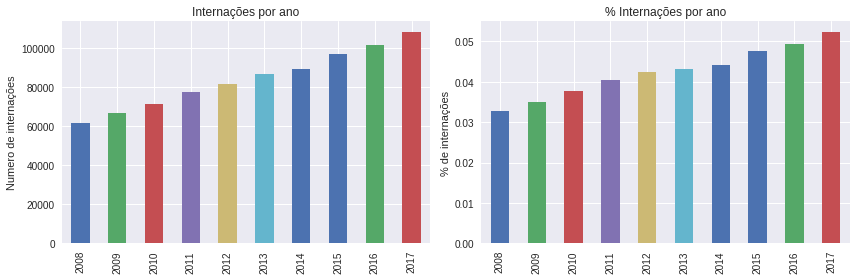

In [7]:
# internações por ano:

def plot_internações_por_ano():
    fig, ax = plt.subplots(1, 2, figsize=(12,4))

    hemato.ANO_CMPT.value_counts().sort_index().plot(kind='bar', title='Internações por ano',
                                                     ax=ax[0])
    ax[0].set_ylabel('Numero de internações')

    pop_total = pop_df.groupby('SIGLA').sum().sum()[:-1]
    int_ano = hemato.groupby('ANO_CMPT').N_AIH.count()
    (int_ano * 100 / pop_total).plot(kind='bar', title='% Internações por ano',
                                     ax=ax[1])
    ax[1].set_ylabel('% de internações')
    ax[1].set_xlabel('')


    plt.tight_layout()
    plt.show()
    
plot_internações_por_ano()

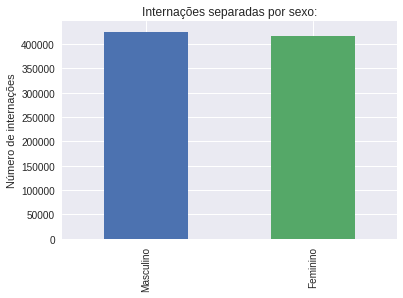

In [8]:
# internações por sexo

hemato.SEXO.map(sex_map).value_counts().plot(kind='bar')
plt.title('Internações separadas por sexo:')
plt.ylabel('Número de internações')
plt.show()

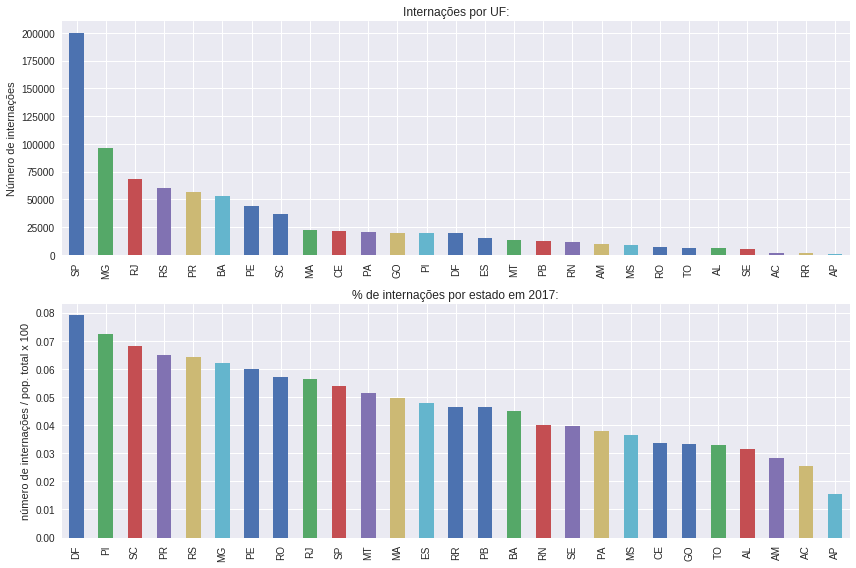

In [9]:
def plot_internacoes_por_estado():
    fig, ax = plt.subplots(2, 1, figsize=(12, 8))

    hemato.UF.value_counts().plot(kind='bar', title='Internações por UF:', ax=ax[0])
    ax[0].set_ylabel('Número de internações')

    int_uf_2017 = hemato.groupby(['ANO_CMPT', 'UF']).N_AIH.count()['2017']
    pop_total = pop_df.groupby('SIGLA').sum()
    (int_uf_2017 * 100 / pop_total['2017']).sort_values(ascending=False).plot(kind='bar',
                                                                  title='% de internações por estado em 2017:',
                                                                  ax=ax[1])
    ax[1].set_ylabel('número de internações / pop. total x 100')
    ax[1].set_xlabel('')

    plt.tight_layout()
    plt.show()
    
plot_internacoes_por_estado()

In [14]:
# internações totais no RS por hospital

def group_int_por_hosp(uf, _map=True, age=18):
    uf = hemato[(hemato.UF == uf) & (hemato.IDADE >= age)]
    if _map:
        mapped = uf.loc[:, 'CNES'].map(cnes_map, na_action='ignore').copy()
        uf.loc[:, 'CNES'] = mapped.copy()
        mapped = uf.loc[:, 'MUNIC_MOV'].map(mun_map,na_action='ignore').copy()
        uf.loc[:, 'MUNIC_MOV'] = mapped.copy()
    group = uf.groupby(['MUNIC_MOV', 'CNES']).SEXO.count().sort_values(ascending=False)
    return group

group = group_int_por_hosp('RS', _map=1, age=18)
group.loc[group > 1000]

MUNIC_MOV     CNES                                                   
Porto Alegre  HOSPITAL DE CLINICAS                                       4581
              HOSPITAL NOSSA SENHORA DA CONCEICAO SA                     3218
Santa Maria   HUSM HOSPITAL UNIVERSITARIO DE SANTA MARIA                 2205
Passo Fundo   HOSPITAL SAO VICENTE DE PAULO                              1570
São Borja     HOSPITAL INFANTIL                                          1347
Porto Alegre  IRMANDADE DA SANTA CASA DE MISERICORDIA DE PORTO ALEGRE    1183
Name: SEXO, dtype: int64

In [15]:
# só < de 18 anos

uf = hemato[(hemato.IDADE < 18) & (hemato.UF == 'RS')]
mapped = uf.loc[:, 'CNES'].map(cnes_map, na_action='ignore').copy()
uf.loc[:, 'CNES'] = mapped.copy()
mapped = uf.loc[:, 'MUNIC_MOV'].map(mun_map,na_action='ignore').copy()
uf.loc[:, 'MUNIC_MOV'] = mapped.copy()
uf.groupby(['MUNIC_MOV', 'CNES']).SEXO.count().sort_values(ascending=False)

MUNIC_MOV               CNES                                                   
Porto Alegre            HOSPITAL DE CLINICAS                                       4030
                        HOSPITAL NOSSA SENHORA DA CONCEICAO SA                     3882
Santa Maria             HUSM HOSPITAL UNIVERSITARIO DE SANTA MARIA                 2221
Porto Alegre            IRMANDADE DA SANTA CASA DE MISERICORDIA DE PORTO ALEGRE    1803
Passo Fundo             HOSPITAL SAO VICENTE DE PAULO                              1008
Caxias do Sul           HOSPITAL GERAL                                              512
Porto Alegre            HOSPITAL SAO LUCAS DA PUCRS                                 495
Pelotas                 HOSPITAL ESCOLA DA UNIVERSIDADE FEDERAL DE PELOTAS          197
Passo Fundo             HOSPITAL DE CLINICAS                                        177
São Borja               HOSPITAL INFANTIL                                           174
Rio Grande              FAHERG          

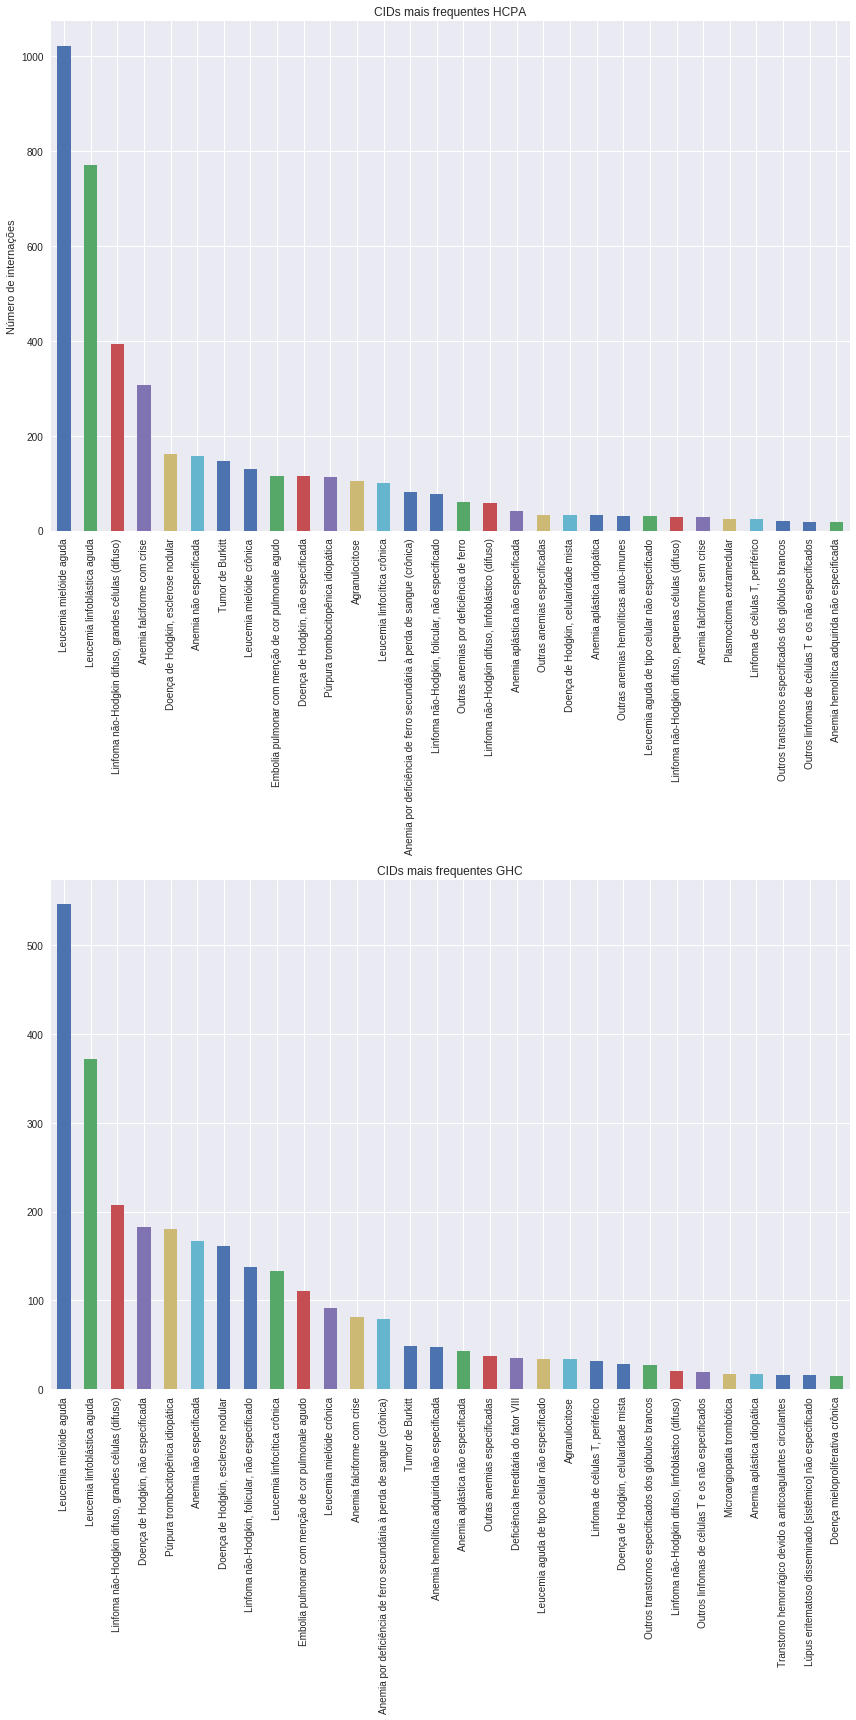

In [16]:
def int_cid_x_cnes(cnes, head=30, age=18):
    return hemato[(hemato.CNES == cnes) & (hemato.IDADE >= age)].DIAG_PRINC.map(cid_map).value_counts().head(head)
    
hcpa = int_cid_x_cnes('2237601')
ghc = int_cid_x_cnes('2237571')

fig, ax = plt.subplots(2, 1, figsize=(12, 24))#, sharey=True)

hcpa.plot(kind='bar', ax=ax[0], title='CIDs mais frequentes HCPA')
ax[0].set_ylabel('Número de internações')
ghc.plot(kind='bar', ax=ax[1], title='CIDs mais frequentes GHC')
plt.tight_layout()
plt.savefig('int_cid_hcpa_x_ghc.png')
plt.show()

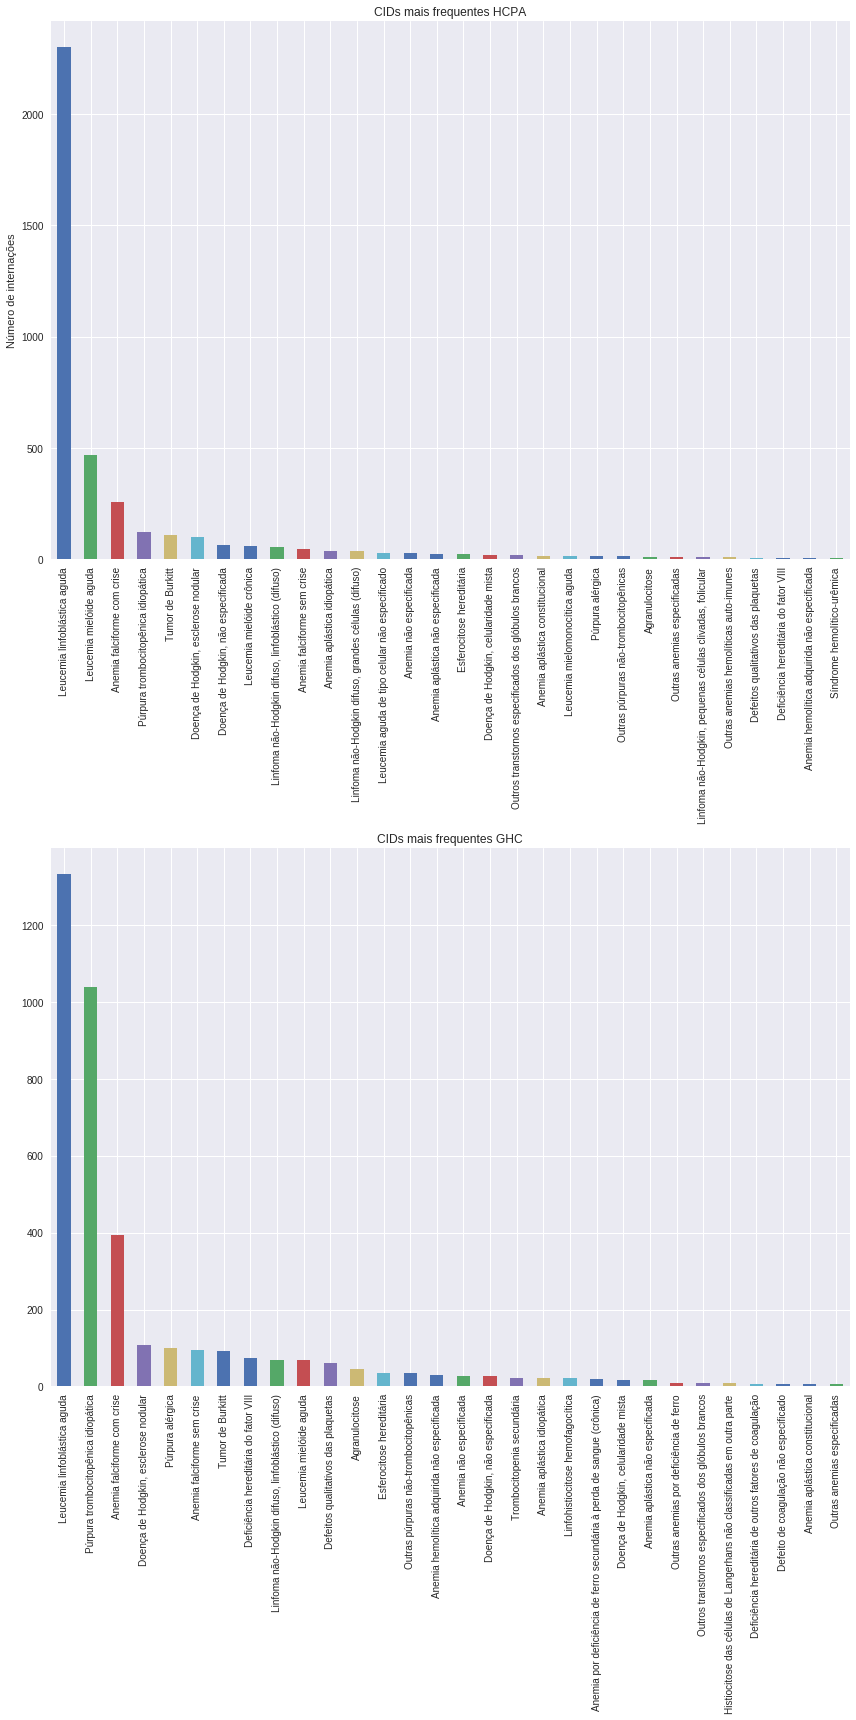

In [17]:
# menor de 18

def int_cid_x_cnes(cnes, head=30, age=18):
    return hemato[(hemato.CNES == cnes) & (hemato.IDADE < age)].DIAG_PRINC.map(cid_map).value_counts().head(head)
    
hcpa = int_cid_x_cnes('2237601')
ghc = int_cid_x_cnes('2237571')

fig, ax = plt.subplots(2, 1, figsize=(12, 24))#, sharey=True)
plt.title('Internações menores de 18 anos')
hcpa.plot(kind='bar', ax=ax[0], title='CIDs mais frequentes HCPA')
ax[0].set_ylabel('Número de internações')
ghc.plot(kind='bar', ax=ax[1], title='CIDs mais frequentes GHC')
plt.tight_layout()
plt.savefig('int_cid_hcpa_x_ghc.png')
plt.show()

In [20]:
# hcpa = int_cid_x_cnes('2237601', df=sem_cca)
# ghc = int_cid_x_cnes('2237571', df=sem_cca)

# fig, ax = plt.subplots(2, 1, figsize=(12, 24))#, sharey=True)

# hcpa.plot(kind='bar', ax=ax[0], title='CIDs mais frequentes HCPA')
# ax[0].set_ylabel('Número de internações')
# ghc.plot(kind='bar', ax=ax[1], title='CIDs mais frequentes GHC')
# plt.tight_layout()
# plt.savefig('int_cid_hcpa_x_ghc.png')
# plt.show()

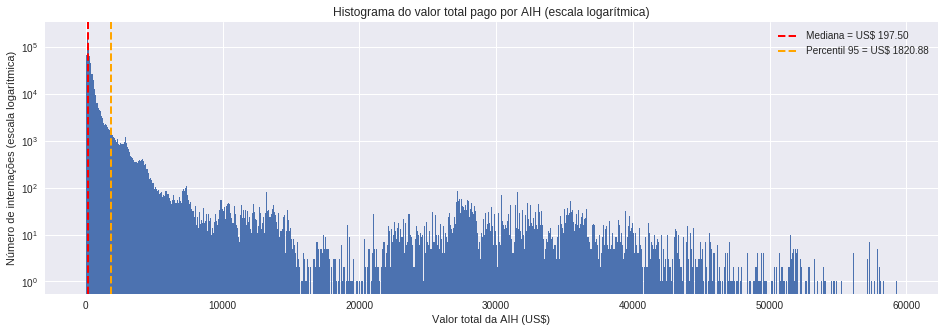

In [21]:
# valor total recebido por AIH
# a escala é logarítmica por causa da amplitude dos valores

hemato.US_TOT.hist(log=True, bins=int(np.sqrt(len(hemato))), figsize=(16, 5))
median = hemato.US_TOT.quantile(.5)

q = .95
p = hemato.US_TOT.quantile(q)
plt.axvline(x=median, color='r', linestyle='--', linewidth=2, label='Mediana = US$ {:.2f}'.format(median))
plt.axvline(x=p, color='orange', linestyle='--', linewidth=2,
            label='Percentil {:.0f} = US$ {:.2f}'.format(q * 100, p))

plt.xlabel('Valor total da AIH (US$)')
plt.ylabel('Número de internações (escala logarítmica)')
plt.legend(loc=1)
plt.title('Histograma do valor total pago por AIH (escala logarítmica)')
plt.show()

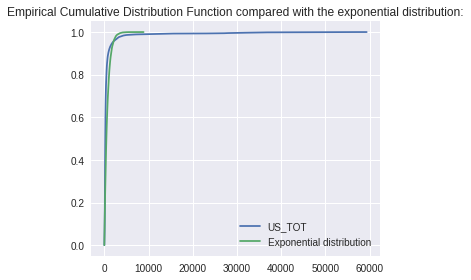

In [22]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(hemato.US_TOT)

mean = hemato.US_TOT.mean()

sample = np.random.exponential(mean, 100000)
cdf_sample = ECDF(sample)


plt.plot(ecdf.x, ecdf.y, label='US_TOT')
plt.plot(cdf_sample.x, cdf_sample.y, label='Exponential distribution')
plt.legend()
plt.title('Empirical Cumulative Distribution Function compared with the exponential distribution:')
plt.tight_layout()
plt.show()

# a US_TOT tem distribuição exponencial

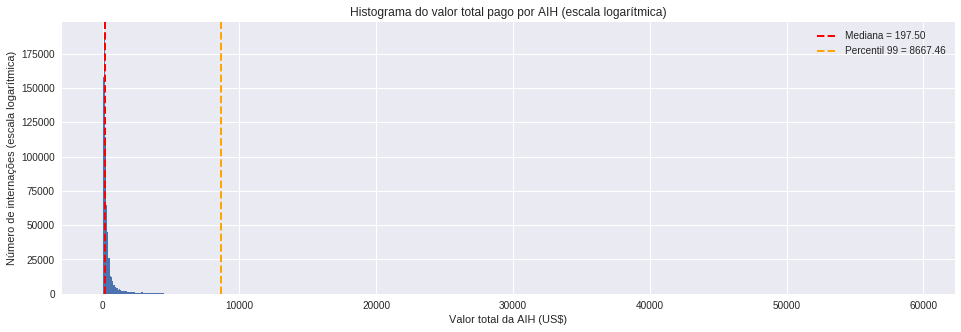

In [23]:
# valor total recebido por AIH
# a escala é logarítmica por causa da amplitude dos valores

hemato.US_TOT.hist(log=False, bins=int(np.sqrt(len(hemato))), figsize=(16, 5))
median = hemato.US_TOT.quantile(.5)

mean = hemato.US_TOT.mean()

p = hemato.US_TOT.quantile(.99)
plt.axvline(x=median, color='r', linestyle='--', linewidth=2, label='Mediana = {:.2f}'.format(median))
plt.axvline(x=p, color='orange', linestyle='--', linewidth=2, label='Percentil 99 = {:.2f}'.format(p))

plt.xlabel('Valor total da AIH (US$)')
plt.ylabel('Número de internações (escala logarítmica)')
plt.legend(loc=1)
plt.title('Histograma do valor total pago por AIH (escala logarítmica)')
plt.show()

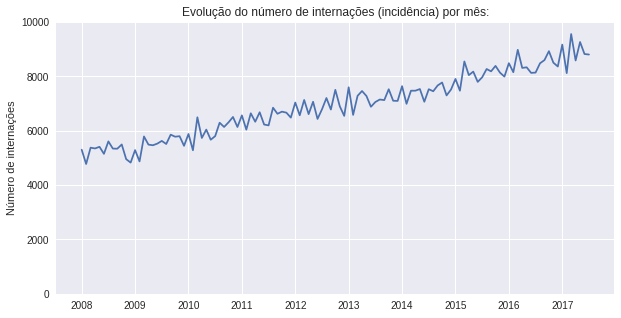

In [24]:
int_by_day = pd.to_datetime(hemato.DT_INTER).value_counts()
# claramente aumentou o número absoluto
# parece que as vezes a velocidade de crescimento diminui um pouco no inverno com picos em fevereiro (?)
# TODO: ver a população a cada ano e ver se aumentou o percentual de internações hemato

int_by_day['2008':'2017'].resample('M').sum()[:-5].plot(figsize=(10, 5),
                                                        ylim=(0, 10000))
plt.title('Evolução do número de internações (incidência) por mês:')
plt.ylabel('Número de internações')
plt.show()

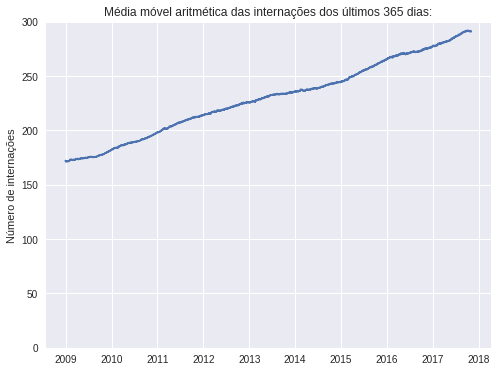

(cada ponto é a média das internações dos últimos 365 dias)


In [25]:
int_by_day['2008':'2017'].resample('D').sum().rolling(365).mean()[:-60].plot(figsize=(8, 6),
                                                                             ylim=(0, 300))
plt.title('Média móvel aritmética das internações dos últimos 365 dias:')
plt.ylabel('Número de internações')
plt.show()
print('(cada ponto é a média das internações dos últimos 365 dias)')

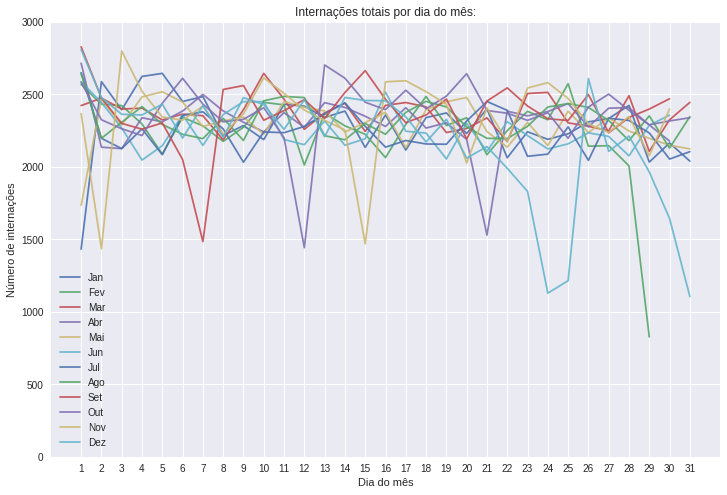

In [26]:
make_daily_int_each_month(hemato)
# os dias com menos internações são feriados

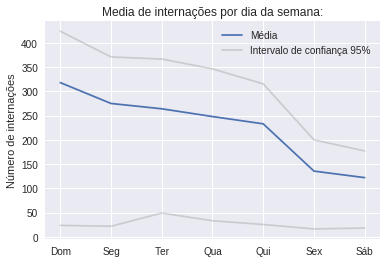

In [27]:
# TODO: numba ou dask to increase performance
# TODO: fazer prevalência


int_by_day.groupby(int_by_day.index.weekday).median().plot(label='Média')

for i in range(5000):
    bootstrap = {}
    for day in range(7):
        bootstrap[day] = (int_by_day[int_by_day.index.weekday == day].sample(frac=1, replace=True)).values

rep_25 = []
rep_975 = []
for k, v in bootstrap.items():
    rep_25.append(np.percentile(v, 2.5))
    rep_975.append(np.percentile(v, 97.5))

plt.plot(rep_25, alpha=.3, c='gray', label='Intervalo de confiança 95%')
plt.plot(rep_975, alpha=.3, c='gray')

plt.xticks(np.arange(7), ['Dom', 'Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb'])
plt.title('Media de internações por dia da semana:')
plt.ylabel('Número de internações')
plt.legend()
plt.ylim=(0,500)
plt.show()

# as internações no início da semana parecem variar muito, mas o menor numero de internações sexta e sábado não.

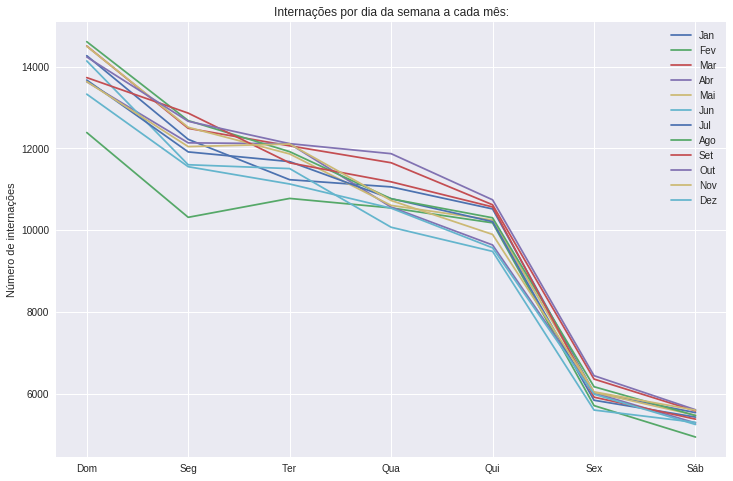

Parece que não muda muito o padrão.


In [28]:
make_weekly_graph(hemato)

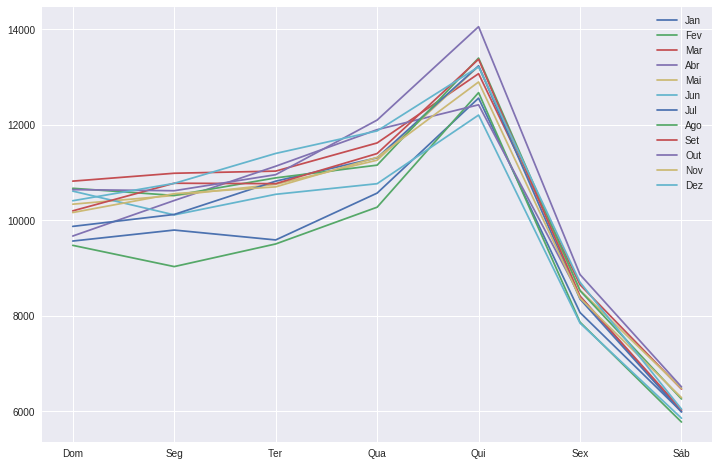

In [29]:
# Altas por dia da semana, em cada mês
# (planejamento de plantões/sobreavisos)
# não é a prevalência, é o número de novas internações (incidência)

# TODO: fazer a média e o IC, como nas internações
# TODO: fazer prevalência

pivoted = hemato.pivot_table('N_AIH', index=hemato.DT_SAIDA.dt.weekday, columns=hemato.DT_SAIDA.dt.month,
                             aggfunc='count')

pivoted.columns.name = None
pivoted.columns = months
pivoted.index.name = None

pivoted.plot(figsize=(12, 8), legend=True)
plt.xticks(np.arange(7), ['Dom', 'Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb'])
plt.show()

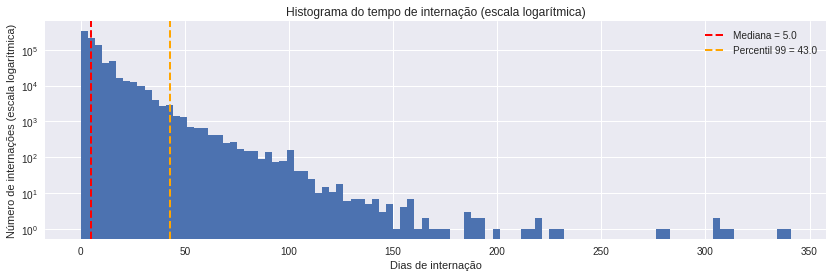

In [30]:
# tempo de internação
# TODO: fazer um ECDF para confirmar a distribuição exponencial

hemato.DIAS_PERM.hist(bins=100, log=True, figsize=(14, 4))
median = hemato.DIAS_PERM.quantile(.5)
p = hemato.DIAS_PERM.quantile(.99)
plt.axvline(x=median, color='r', linestyle='--', linewidth=2, label='Mediana = {}'.format(median))
plt.axvline(x=p, color='orange', linestyle='--', linewidth=2, label='Percentil 99 = {}'.format(p))

plt.xlabel('Dias de internação')
plt.ylabel('Número de internações (escala logarítmica)')
plt.legend(loc=1)
plt.title('Histograma do tempo de internação (escala logarítmica)')
plt.show()

In [37]:
hemato.columns

Index(['N_AIH', 'DT_INTER', 'DT_SAIDA', 'US_TOT', 'DIAS_PERM', 'ANO_CMPT',
       'DIAG_PRINC', 'MORTE', 'IDADE', 'CNES', 'UF', 'SEXO', 'ETNIA',
       'COMPLEX', 'CAR_INT', 'MUNIC_RES', 'MUNIC_MOV'],
      dtype='object')

## Machine Learning

In [70]:
X = hemato.copy() #drop(['MORTE', 'N_AIH'], axis=1)
# y = hemato.MORTE

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X_labeled = {}
for col in X.select_dtypes(exclude='number').columns:
    le = LabelEncoder()
    
    #save it on a dict to make the inverse transform if needed
    X[col] = le.fit_transform(X[col])
    X_labeled[col] = le

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

/home/gui/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, uint16, int64, float32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/gui/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, uint16, int64, float32 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [64]:
from sklearn.cluster import KMeans

clf = KMeans(2)

clf.fit(X)

kmeans = clf.predict(X)

print('MMeans accuracy: {}'.format(accuracy_score(y, kmeans)))

MMeans accuracy: 0.9360156554656217


In [96]:
%%time
from sklearn.decomposition import PCA
pca = PCA(2)
X2 = pca.fit_transform(X.T)

CPU times: user 8.27 s, sys: 524 ms, total: 8.8 s
Wall time: 2.61 s


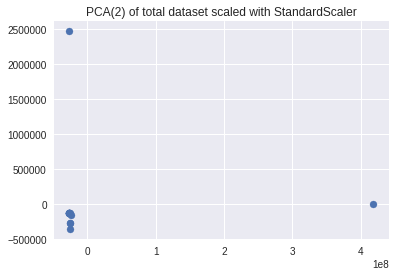

In [97]:
plt.scatter(X2[:,0], X2[:,1])
plt.title('PCA(2) of total dataset scaled with StandardScaler')
plt.show()

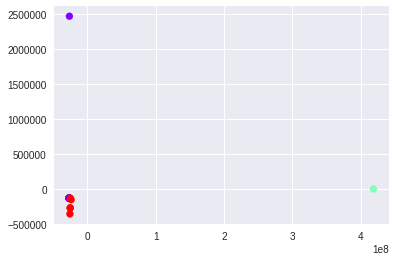

CPU times: user 140 ms, sys: 4 ms, total: 144 ms
Wall time: 142 ms


In [100]:
%%time
from sklearn.cluster import KMeans
clf = KMeans(3, n_jobs=-1)
clf.fit(X2)

plt.scatter(X2[:,0], X2[:,1], c=clf.labels_, cmap='rainbow')
plt.show()

#TODO: continuar analisando a segmentação das colunas

In [104]:
pd.DataFrame(X2, index=X.T.index)

,0,1
N_AIH,4.184304e+08,1.548760e+03
DT_INTER,-2.506990e+07,-2.703360e+05
DT_SAIDA,-2.507279e+07,-2.673880e+05
US_TOT,-2.622381e+07,2.464389e+06
DIAS_PERM,-2.677741e+07,-1.264706e+05
ANO_CMPT,-2.677917e+07,-1.295581e+05
DIAG_PRINC,-2.674527e+07,-1.332105e+05
MORTE,-2.678316e+07,-1.291886e+05
IDADE,-2.675396e+07,-1.308605e+05
CNES,-2.547938e+07,-3.540274e+05


-1    841112
dtype: int64


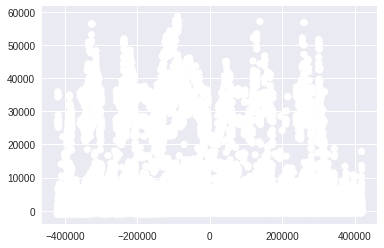

CPU times: user 55 s, sys: 459 ms, total: 55.5 s
Wall time: 35.4 s


In [95]:
%%time
from sklearn.cluster import DBSCAN
clf = DBSCAN(n_jobs=-1)
clf.fit(X)

print(pd.Series(clf.labels_).value_counts())

plt.scatter(X2[:,0], X2[:,1], c=clf.labels_)
plt.show()

# classificou todos só em um cluster

In [89]:
# %%time
# from sklearn.cluster import Birch
# clf = Birch(n_clusters=2)
# clf.fit(X)

# # MemoryError

In [63]:
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy='most_frequent')
clf.fit(X, y)
dummy = clf.predict(X)

from sklearn.metrics import accuracy_score

print('Dummy accuracy: {}'.format(accuracy_score(y, dummy)))

Dummy accuracy: 0.9415535624268825


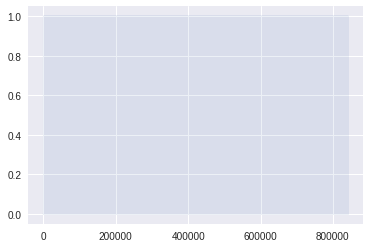

In [46]:
plt.plot(clf.labels_, alpha=.1)

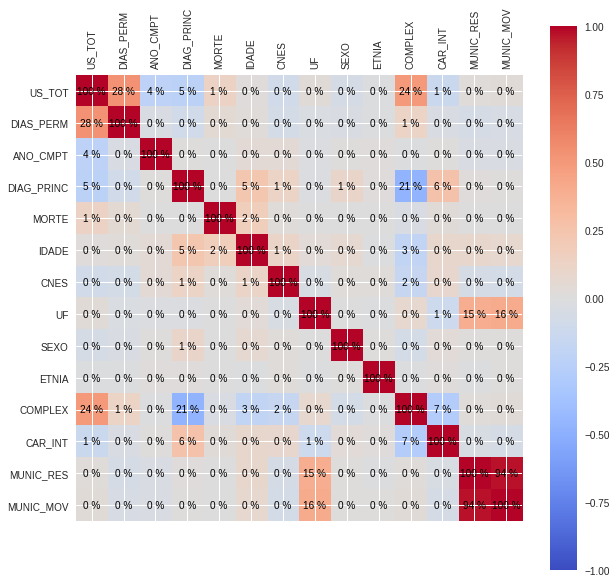

In [23]:
# Searching for correlations using pandas.corr
# TODO: Is this corr the same each year?

data = pd.DataFrame(X_scaled, columns=hemato.columns).drop(['N_AIH', 'DT_INTER', 'DT_SAIDA'], axis=1)
corr = data.corr('spearman')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)

ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)

for i in range(len(corr.index)):
    for j in range(len(corr.columns)):
        text = ax.text(j, i, '{} %'.format(int(corr.iloc[i, j] ** 2 * 100)),
                       ha="center", va="center", color="k")
plt.show()

# o percentual se refere ao quanto a variação do eixo y é atribuida ao x

In [24]:
from scipy.stats import pearsonr, spearmanr
p = pearsonr(X_scaled[0], X_scaled[1])
s = spearmanr(X_scaled[0], X_scaled[1])

## Todo:

X DIAG_PRINC separar CIDs de hemato antes de juntar os arquivos.

X Por que o N_AIH tem numeros repetidos? Interna várias vezes com o mesmo registro? Erro?

Identificar a cidade pelo CEP e verificar quem tem um endereço e interna em outra cidade/estado.

Posso usar o MUNIC_RES pra fazer o que escrevi acima.

UTI_MES_TO e UTI_INT_TO pode dizer quais CIDs são mais graves. Se o percentual de internações graves aumentou. Posso relacionar se morrem muito na UTI ou se salvam muito.

Hemato ganha muita diaria de acompanhante? DIAR_ACOM

Quais CIDs ficam mais tempo internado? QT_DIARIAS Algum estado demora mais no tratamento, comparando mesmas doenças? Isso se reflete no resultado do tto?

----------
##### Financeiro

VAL_SH (hosp) VAL_SP (profissional) VAL_TOT VAL_UTI US_TOT Quanto paga cada internação de hemato? Qual paga mais?

FINANC A grana vem de onde?

VAL_SADT, VAL_ACOMP, VAL_SANGUE está zerado???

90 VAL_SH_FED numeric (10, 2) Valor do complemento federal de serviços hospitalares. Está
 incluído no valor total da AIH.

91 VAL_SP_FED numeric (10, 2) Valor do complemento federal de serviços profissionais. Está
 incluído no valor total da AIH.

92 VAL_SH_GES numeric (10, 2) Valor do complemento do gestor (estadual ou municipal) de
 serviços hospitalares. Está incluído no valor total da AIH.

93 VAL_SP_GES numeric (10, 2) Valor do complemento do gestor (estadual ou municipal) de
 serviços profissionais. Está incluído no valor total da AIH.
 
VAL_UCI O que é UCI???

-----------

DT_INTER DT_SAIDA DIAS_PERM Datas de int e alta conferem com as diárias? Há datas de anos/meses anteriores que contaram nesta competencia (atraso de envio?)

Não incluí a natureza jurídica e a gestão porque é certo que vai ter mais internações nos tipos de lugares que existem, seja por imposição legal ou incentivo fiscal. Não quer dizer que sejam mais importantes.

MUNIC_MOV Municipio do estabelecimento. Este dado é confiável? Se for, posso usar pra comparar com o MUNIC_RES.

COD_IDADE IDADE Perfil de idade dos pacientes atendidos.

NACIONAL Nacionalidade do paciente

CAR_INT Vem muito pct hemato de emergência?

CBOR NUM_FILHOS INSTRU VINCPREV Acho importante pra comparar por regiões e por tempo, mas tenho dúvidas da veracidade dos dados.

RACA_COR ETNIA Comparar as duas classificações.

Qual a prevalência de pacientes internados? (Como calcular a prevalencia?)